In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle  # version 0.19.3

In [2]:
gpu_devices = cle.available_device_names(dev_type="gpu")
print("Available GPU OpenCL devices:" + str(gpu_devices))

Available GPU OpenCL devices:['Quadro RTX 5000']


In [3]:
cle.select_device("RTX")
print("Using OpenCL device " + cle.get_device().name)

Using OpenCL device Quadro RTX 5000


In [4]:
import numpy as np

In [43]:
import os
name = "C2-20ul_liposome_with_high_peptide_30ms_33.33hz_1_ch1_right.tif"
path = "D:/Data/Sucharita"
file_path = os.path.join(path, name)
data = imread(file_path)[0]
print(data.shape)

(684, 428)


cl.OCLArray([[427., 416., 432., ..., 427., 432., 435.],
       [436., 426., 417., ..., 423., 408., 408.],
       [440., 433., 421., ..., 411., 428., 411.],
       ...,
       [433., 409., 423., ..., 397., 411., 419.],
       [420., 415., 416., ..., 417., 414., 413.],
       [453., 411., 414., ..., 420., 411., 409.]], dtype=float32)
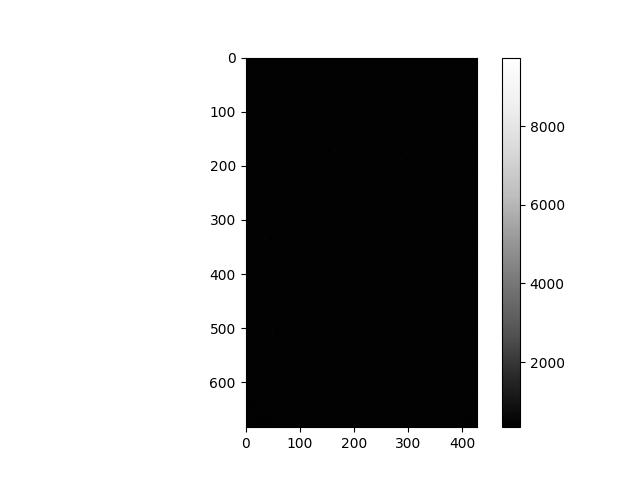
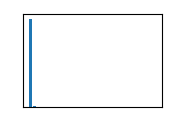

In [44]:
data = cle.push(data)
# cle.imshow(data, min_display_intensity=data.min(), max_display_intensity=data.max())
data

cl.OCLArray([[1, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)
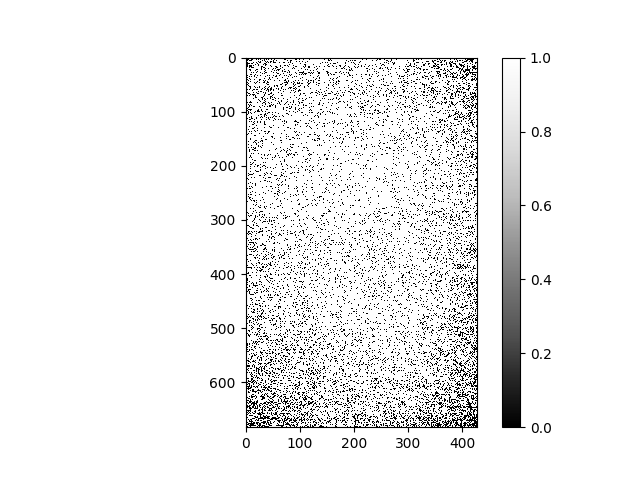
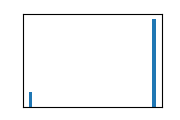

In [38]:
# thresh = threshold_otsu(image)
# thresh_img = subtract(image, thresh, image.dtype)
# top_hat_img = top_hat(thresh_img)
# blobs = feature.blob_log(top_hat_img, num_sigma= 100, overlap=0.9, threshold=0.1)
thresh = cle.threshold_otsu(data)
uint16_min = np.iinfo(np.dtype('uint16')).min
uint16_max = np.iinfo(np.dtype('uint16')).max

# thresh_img = cle.clip(data -thresh,a_min = uint16_min, a_max=uint16_max )

# top_hat_img = cle.top_hat_box(thresh_img ) #top_hat(thresh_img)
# blobs = cle.difference_of_gaussian(top_hat_img)
# cle.imshow(thresh, min_display_intensity=thresh_img.min(), max_display_intensity=thresh_img.max())
thresh